

# **Automated Hate Speech Detection in Online Group Chat Platforms**

# Problem Statement
* The rise of anonymous online group chat rooms has provided a space for free and open communication.
* However, these platforms are also prone to misuse, including the spread of hate speech.
* The business problem we are addressing is the need for an effective mechanism to automatically detect and mitigate hate speech in these chat rooms, ensuring a safer and more welcoming environment for all users.

# Solution Description
The proposed solution for detecting and mitigating hate speech in online group chat platforms involves developing a deep learning model using a **Bidirectional Long Short-Term Memory (LSTM) network** with **GloVe embeddings**.



*   This model is designed to automatically detect hate speech in online group chat platforms using deep learning techniques.
* The use of Bidirectional LSTM layers enables the model to understand the context from both directions of the text, making it more effective in capturing the nuances of hate speech.
* The inclusion of dropout layers helps prevent overfitting, and the use of GloVe embeddings leverages pre-trained word vectors to improve the model's understanding of semantic relationships.
* By monitoring the ROC-AUC score and applying early stopping, the model is trained efficiently while ensuring the best possible performance on unseen data.




# Dataset Description:

**Data Sources**

1. **Cyberbullying Data from Formspring.me:**
* Formspring is a site where people can chat anonymously about each other.
* Contains instances of cyberbullying, which is a subset of hate speech, annotated for bullying and offensive content.


2. **ConvAbuse Dataset:**
* Various texts have been collected by various chatbots from chats.
* The dataset provided with a large number of texts with various labels like is_abuse, racist, sexism, generalized and so on.

**Final Dataset:**

* The final dataset is a combination of both Cyberbullying Data from Formspring.me and ConvAbuse Datasets.
* The dataset consists of 2 Columns:
  1. **Text:** The text message.
  2. **Label:** The label indicating whether the text is hate speech (1) or not (0).
  
**Sample Rows:**
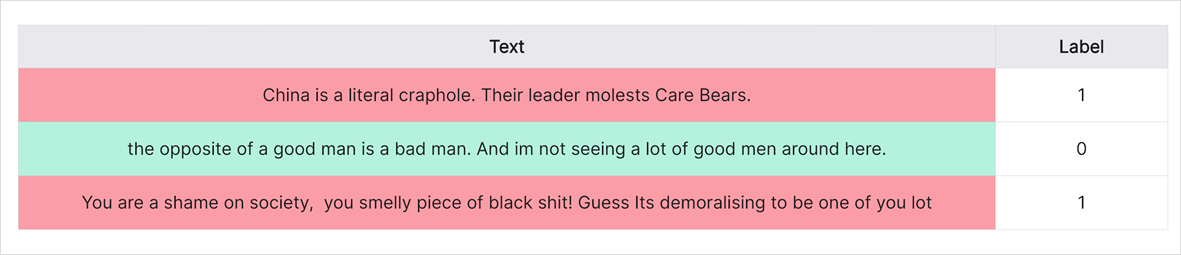



# Dataset Characteristics:
* Size of the dataset: 17,596
*	No. of columns: 2 - Text, Label
*	No. of records with label=1: 7,100
*	Percentage of hate records: 40.4%
* Vocabulary Size: 22,147

<h1 align='center'> Disribution of Labels in Dataset:

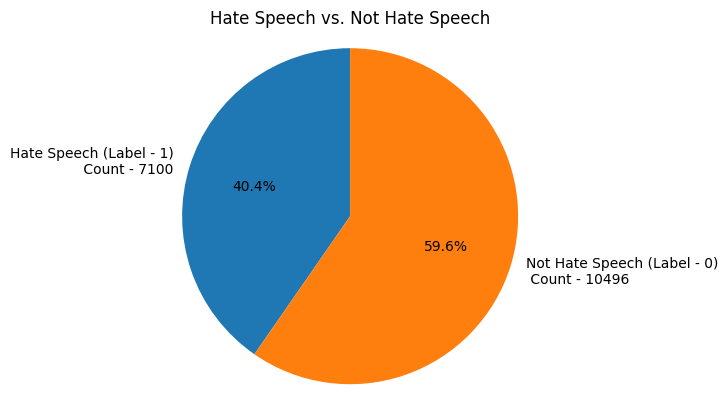

# Visualise the data according to the 'Text' character length: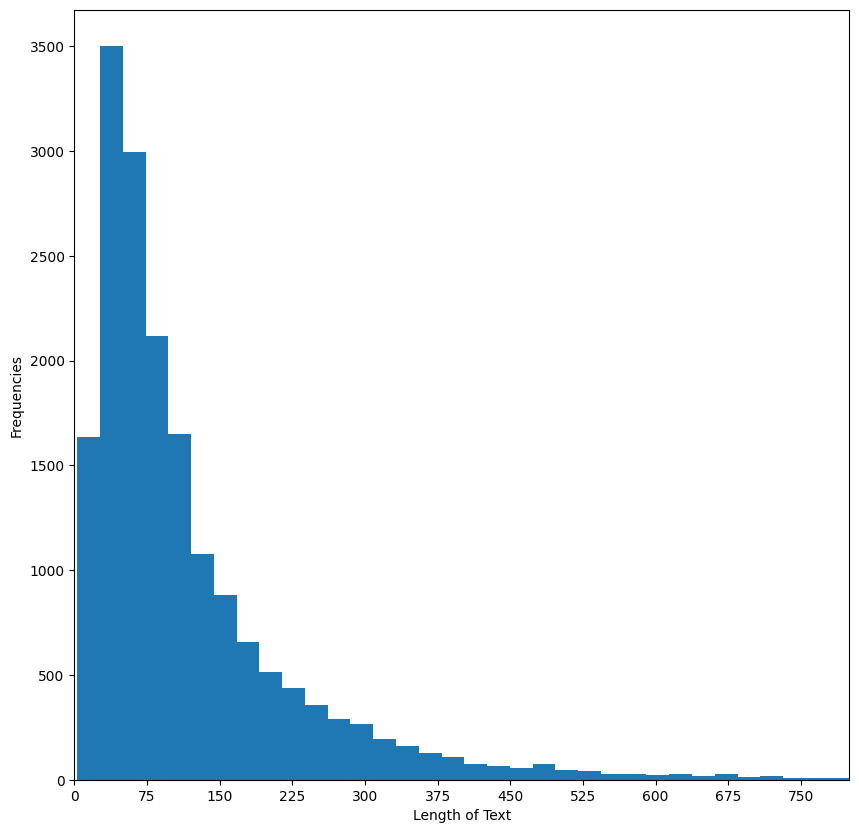

# Data Preprocessing
The first step in our hate speech detection model involves collecting and preprocessing the data. This step is crucial as the quality and cleanliness of the data significantly affect the model's performance.


After observing the dataset, we can infer that we need to clean and transform the raw text data into a format suitable for our model. This involves several sub-steps:

1. **Removing Extra Spaces:** Normalize the spacing in the text to remove any extra spaces.

2. **Removing usernames:** Same as for the URL, a username in a text won’t give any valuable information because it won’t be recognized as a word carrying meaning. We will then remove it.

3. **Removing Hashtags:** Hashtags are hard to apprehend, but usually contain useful information about the context of a text and its content. The problem with hashtags is that the words are all after the other, without a space. So to utilize this we only remove the hashtag character(#) and the remaining word is preserved.

4. **Handling Contractions:** Handling contractions in text is an important step in text preprocessing, especially for tasks like hate speech detection where understanding the full meaning of the words is crucial. Contractions are shortened forms of words or combinations of words created by omitting certain letters and sounds (e.g., "don't" for "do not", "I'm" for "I am").

5. **Lowercasing:** Convert all text to lowercase to ensure uniformity, as the model should treat "Hate" and "hate" as the same word.

6. **Removing Punctuation:** Strip out punctuation to focus on the words themselves.

7. **Removing URLs:** URLs do not give any information when we try to analyze text from words.

8. **Removing Short words:** Short words are the words whose length is less than three. Examples of this are - 'a', 'an', 'is' etc. Generally these words do not contain contextual meaning while detecting hate speech. Hence they can be removed.

9. **Lemmatization:** Lemmatization is the process of grouping together different inflected forms of the same word. The goal of lemmatization is to reduce a word to its root form, also called a lemma.


# Train - Test - Validation Data Splitting:
* **Train split - 70% of Dataset- 12317 records**

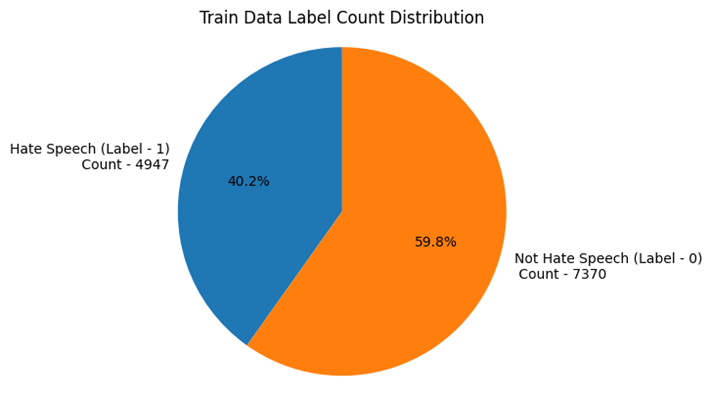


* **Test Split - 20% of Dataset - 3520 records**
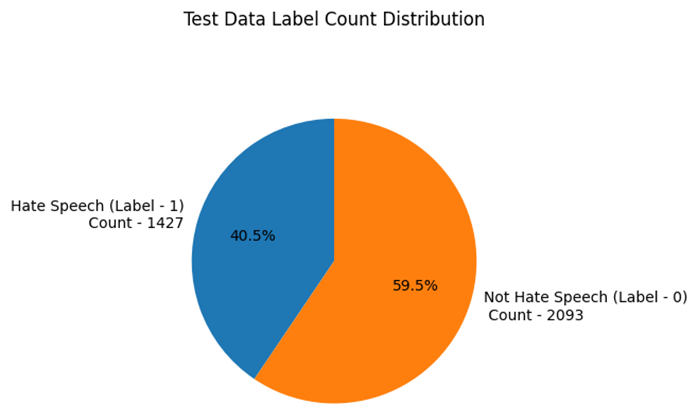

* **Validation split - 10% of Dataset - 1759 records**

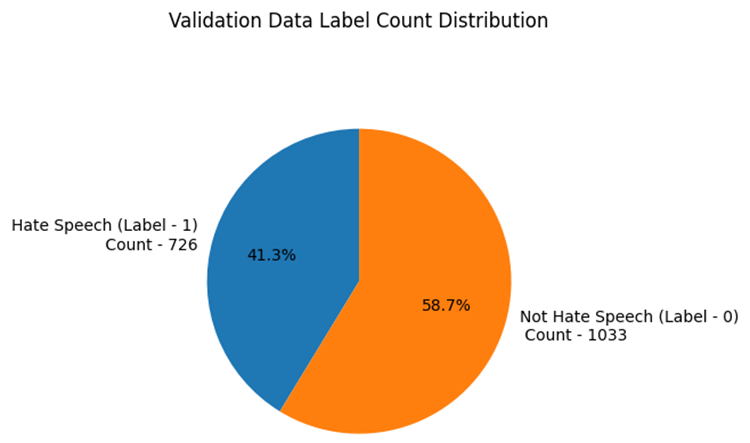

# Handling Imbalances in training data:
From the above output, we can observe that there is an imbalance in 'Label' column in the dataset as we can see there are 4097 instances of label '0' where as there are only 7370 instances of label '1'. This would significantly effect model training because models trained on this dataset might be biased towards the majority class (non-hate speech) and may not perform as well in identifying hate speech instances.

**Resampling Training data using Random Oversampler:**

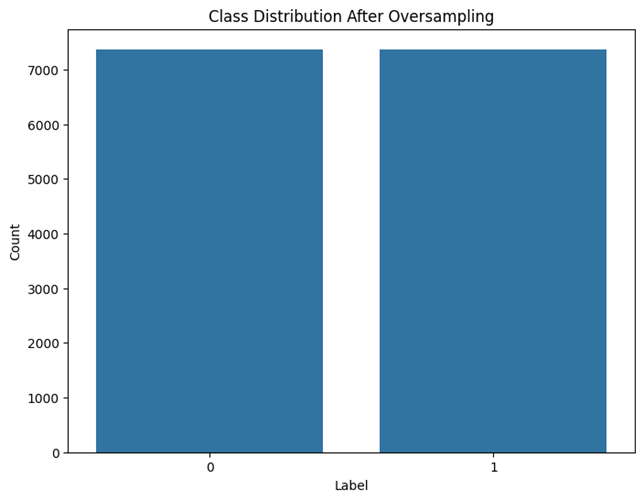

# **Modeling:**

# Machine Learning Models:
* **Support Vector Machines**
* **Naive Bayes**
* **Logistic Regression**

# Deep Learning Models:
* **Convolutional Neural Networks (CNN)**
* **Recurrent Neural Networks (RNN)**
* **Bidirectional Long Short Term Memory (LSTM) Model**




# Final Deep Learning Model:
**Bidirectional Long Short Term Memory (LSTM) Model-**

 Bi LSTM networks are particularly well-suited for text classification tasks, such as automated hate speech detection, due to several compelling reasons:
 * Bidirectional LSTM networks read the input sequence both forward and backward, enabling them to capture context from both directions
 * Bidirectional LSTM networks are capable of retaining and utilizing long-term dependencies in text, making them more effective for understanding the nuanced relationships in hate speech

 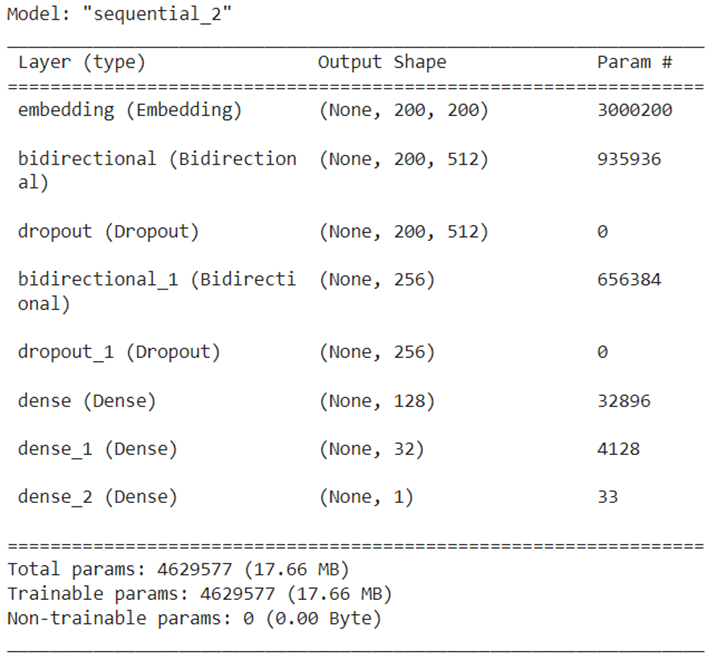

**Model Compilation:**
* The model is compiled using the Adam optimizer. The loss function used is binary cross-entropy, suitable for binary classification tasks. The model's performance is evaluated using the AUC (Area Under the Curve) metric, named roc_auc.

**Early Stopping:**

* An EarlyStopping callback is used to monitor the val_roc_auc metric. Training stops if the val_roc_auc does not improve for 3 consecutive epochs, and the best model weights are restored.

**Model Training:**

* The model is trained on X_train and y_train for up to 15 epochs. A batch size of 64 is used. The early_stopping callback is included to prevent overfitting. The validation data (X_val, y_val) is used to monitor the model's performance during training.

# Confusion Matrix:
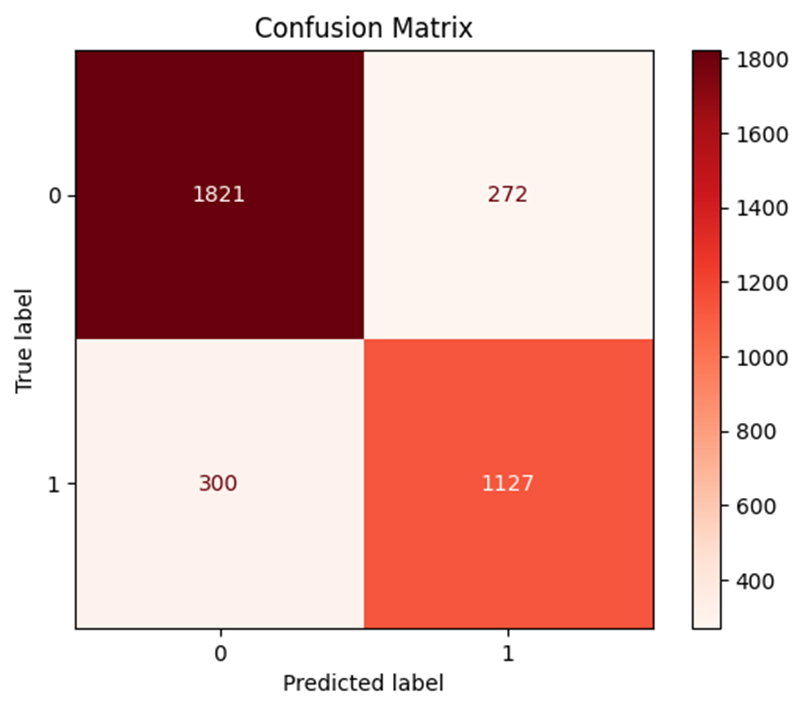

# Classification Report:
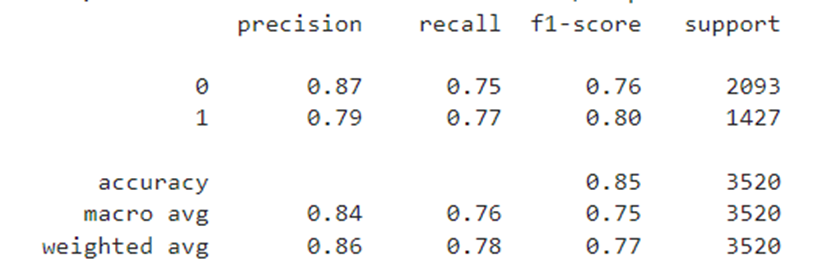

**ROC AUC Score:** 0.8265365915885402

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:

from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Infosys/hatespeechdetection.keras')


In [37]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='roc_auc')])


In [38]:
pip install contractions

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import contractions
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Assuming you have the tokenizer used during training
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
# Initialize with the same number of words as used during training

def preprocess_text(text, tokenizer, max_length=200):

  text = re.sub(r'\s+', ' ', text)

  #Remove usernames:
  text = re.sub(r"@\S+", "",text)

  #Remove Hashtags:
  text = re.sub(r'#', '', text)

  #Handling Contractions:
  text=contractions.fix(text)

  #Lowercasing:
  text = text.lower()

  #Removing Punctuation:
  text = re.sub(r'[^\w\s]', '', text)

  #Remove URLs:
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

  #Removing Short words
  text = ' '.join([word for word in text.split() if len(word) > 2 or word.isnumeric()])

  #Lemmatization
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  sequences = tokenizer.texts_to_sequences([text])
  padded_sequences = pad_sequences(sequences, maxlen=max_length)
  return padded_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [40]:
while True:
    input_text = input("Enter text to classify (or 'exit' to quit): ")
    if input_text.lower() == 'exit':
        break

    # Preprocess the input text
    processed_input = preprocess_text(input_text, tokenizer)

    # Make predictions
    prediction = loaded_model.predict(processed_input)
    predicted_classes = (prediction > 0.5).astype("int32")
    result = "Hate Speech" if predicted_classes[0] == 1 else "Not Hate Speech"
    # Print the result
    print(f"Predicted Class: {predicted_classes[0]}",result)


Enter text to classify (or 'exit' to quit): China is a literal craphole. Their leader molests Care Bears.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: [1] Hate Speech
Enter text to classify (or 'exit' to quit): the opposite of a good man is a bad man. And im not seeing a lot of good men around here.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted Class: [0] Not Hate Speech
Enter text to classify (or 'exit' to quit): You are a shame on society,  you smelly piece of black shit! Guess Its demoralising to be one of you lot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Class: [1] Hate Speech
Enter text to classify (or 'exit' to quit): exit
